## Black Friday Sale
 EDA AND Feature Engineering


# Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [67]:
# dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

In [69]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

Always Rememeber Whenever train and test data is given , make sure always first to combine them ,so that whatever data preprocessing we want to do , we do on both of them

Merge, join, concatenate ,append  -- different approaches of joining dataframe
https://pandas.pydata.org/docs/user_guide/merging.html

1.concat(): Merge multiple Series or DataFrame objects along a shared index or column
2.join():Merge multiple DataFrame objects along the columns                    
3.merge(): Combine two Series or DataFrame objects with SQL-style joining



In [70]:
data=pd.concat([df_train,df_test])
data.tail(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233589,1006030,P00241442,M,26-35,17,C,1,1,2,15.0,NaN,NaN
233590,1006032,P00252442,M,46-50,7,A,3,0,8,NaN,NaN,NaN
233591,1006033,P00127642,M,51-55,13,B,1,1,1,2.0,15.0,NaN
233592,1006035,P00135742,F,26-35,1,C,3,0,6,8.0,NaN,NaN
233593,1006036,P00255442,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN


## Delete the columns which are of no use

axis=0 ---rowwise (horizontally)

axis=1 ---columnwise

In [71]:
data.drop(['User_ID'],axis=1,inplace=True)

In [72]:
data

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Fixing the Categorical Features

Convert Categorical data into numerical bcz our model wont be able to understand it

1.Handling Categorical Feature Gender

In [74]:
# Convert categorical variable into dummy/indicator variables.
# Each variable is converted in as many 0/1 variables as there are different values.
# Columns in the output are each named after a value; if the input is a DataFrame, the name of the original variable is prepended to the value.

#SO get_dummies is somewhat same like a one hot encoding
pd.get_dummies(data['Gender'])
#or
#can do like this
# data['Gender']=pd.get_dummies(data['Gender'],drop_first=1)

# But now we want to do it inplace without modifying anything so use map function

# MAP FUNCTION
# Map values of Series according to an input mapping or function.
data['Gender']=data['Gender'].map({'F':0,'M':1})
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


### 2.Handling Categorical Feature Age

In [75]:
data.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [76]:
pd.get_dummies(data['Age'],drop_first=True)
# Now either we can simply use these columns in the dataframe

,18-25,26-35,36-45,46-50,51-55,55+
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
233594,False,True,False,False,False,False
233595,False,True,False,False,False,False
233596,False,True,False,False,False,False
233597,False,False,False,True,False,False


####  Distribution of Age

<Axes: xlabel='Age'>

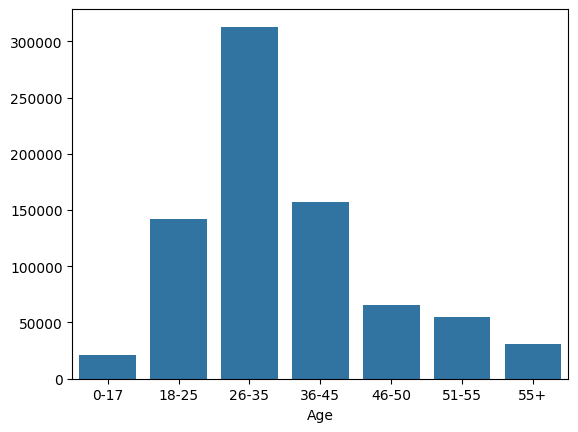

In [77]:
newd=data.groupby('Age').Age.value_counts()
newd
sns.barplot(x=newd.index,y=newd.values)

Now If I see the distribution of Age ,I can see that age grups like 0-17 and 55+ are very low in nmubers ,so why not rank them according to numbers
#just use simple label encoding
this way our model maths will definitely will be able to understand that age groups are more important-==- Known as Target Guiding

In [78]:
# So I assigned labels according 
data['Age']=data['Age'].map({'0-17':1, '55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2})

or I can use Label Encoding from Sklearn Library

In [79]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


### Handling City

In [80]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [81]:
df_city=pd.get_dummies(data['City_Category'],drop_first=True)   # dropfirst bcz 2 categories are sufficient to represent 3 categories
df_city
#drop_first=True means drop 1st level

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True
...,...,...
233594,True,False
233595,True,False
233596,True,False
233597,False,True


In [82]:
#combine orginal datset
data=pd.concat([data,df_city],axis=1)
data.drop(['City_Category'],axis=1,inplace=True)  
data

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,True,False
233595,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,True,False
233596,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,True,False
233597,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,False,True


In [83]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [84]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [85]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [86]:
#  Numerical Columns
df_train.describe().columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [87]:
df_train.shape

(550068, 12)

## Missing Values

In [88]:
# NUll Columns
data.isnull().sum()


Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [89]:
## Focus ON replacing missing values (not purchase bcz null coming due to train data combined)

data['Product_Category_2'].unique()
# Now here the feature is a dcrete or continuos feature?
# ofcourse a discrete feature
# so it can have only these values


#Best way to replace discrete feature is by replacing them by mode
# a=data['Product_Category_2'].value_counts()
# data['Product_Category_2'].fillna(a.index[0],inplace=True)
# data['Product_Category_2']

# or better
print(data['Product_Category_2'].mode()[0])
data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0],inplace=True)


8.0


In [90]:
data['Product_Category_2'].isnull().sum()

0

In [91]:
# PRoduct Category 3 Replace Missing Values
data['Product_Category_3'].fillna(data['Product_Category_3'].mode()[0],inplace=True)


In [92]:
data['Product_Category_3'].isnull().sum()

0

In [93]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [94]:
# replace 4+ to 4
data['Stay_In_Current_City_Years'].replace({'4+':'4'},inplace=True)

data.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                                bool
C                                bool
dtype: object

In [95]:
# convert object into integer
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype(int)
data['C']=data['C'].astype(int)
data['B']=data['B'].astype(int)
data.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               int32
C                               int32
dtype: object

In [96]:
data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

Now OUR TASK is Completed as only Purchase have NULL which is due to train dataset being merged and 
also onnly prodct id is of obeject type remaining

# Data Visualation


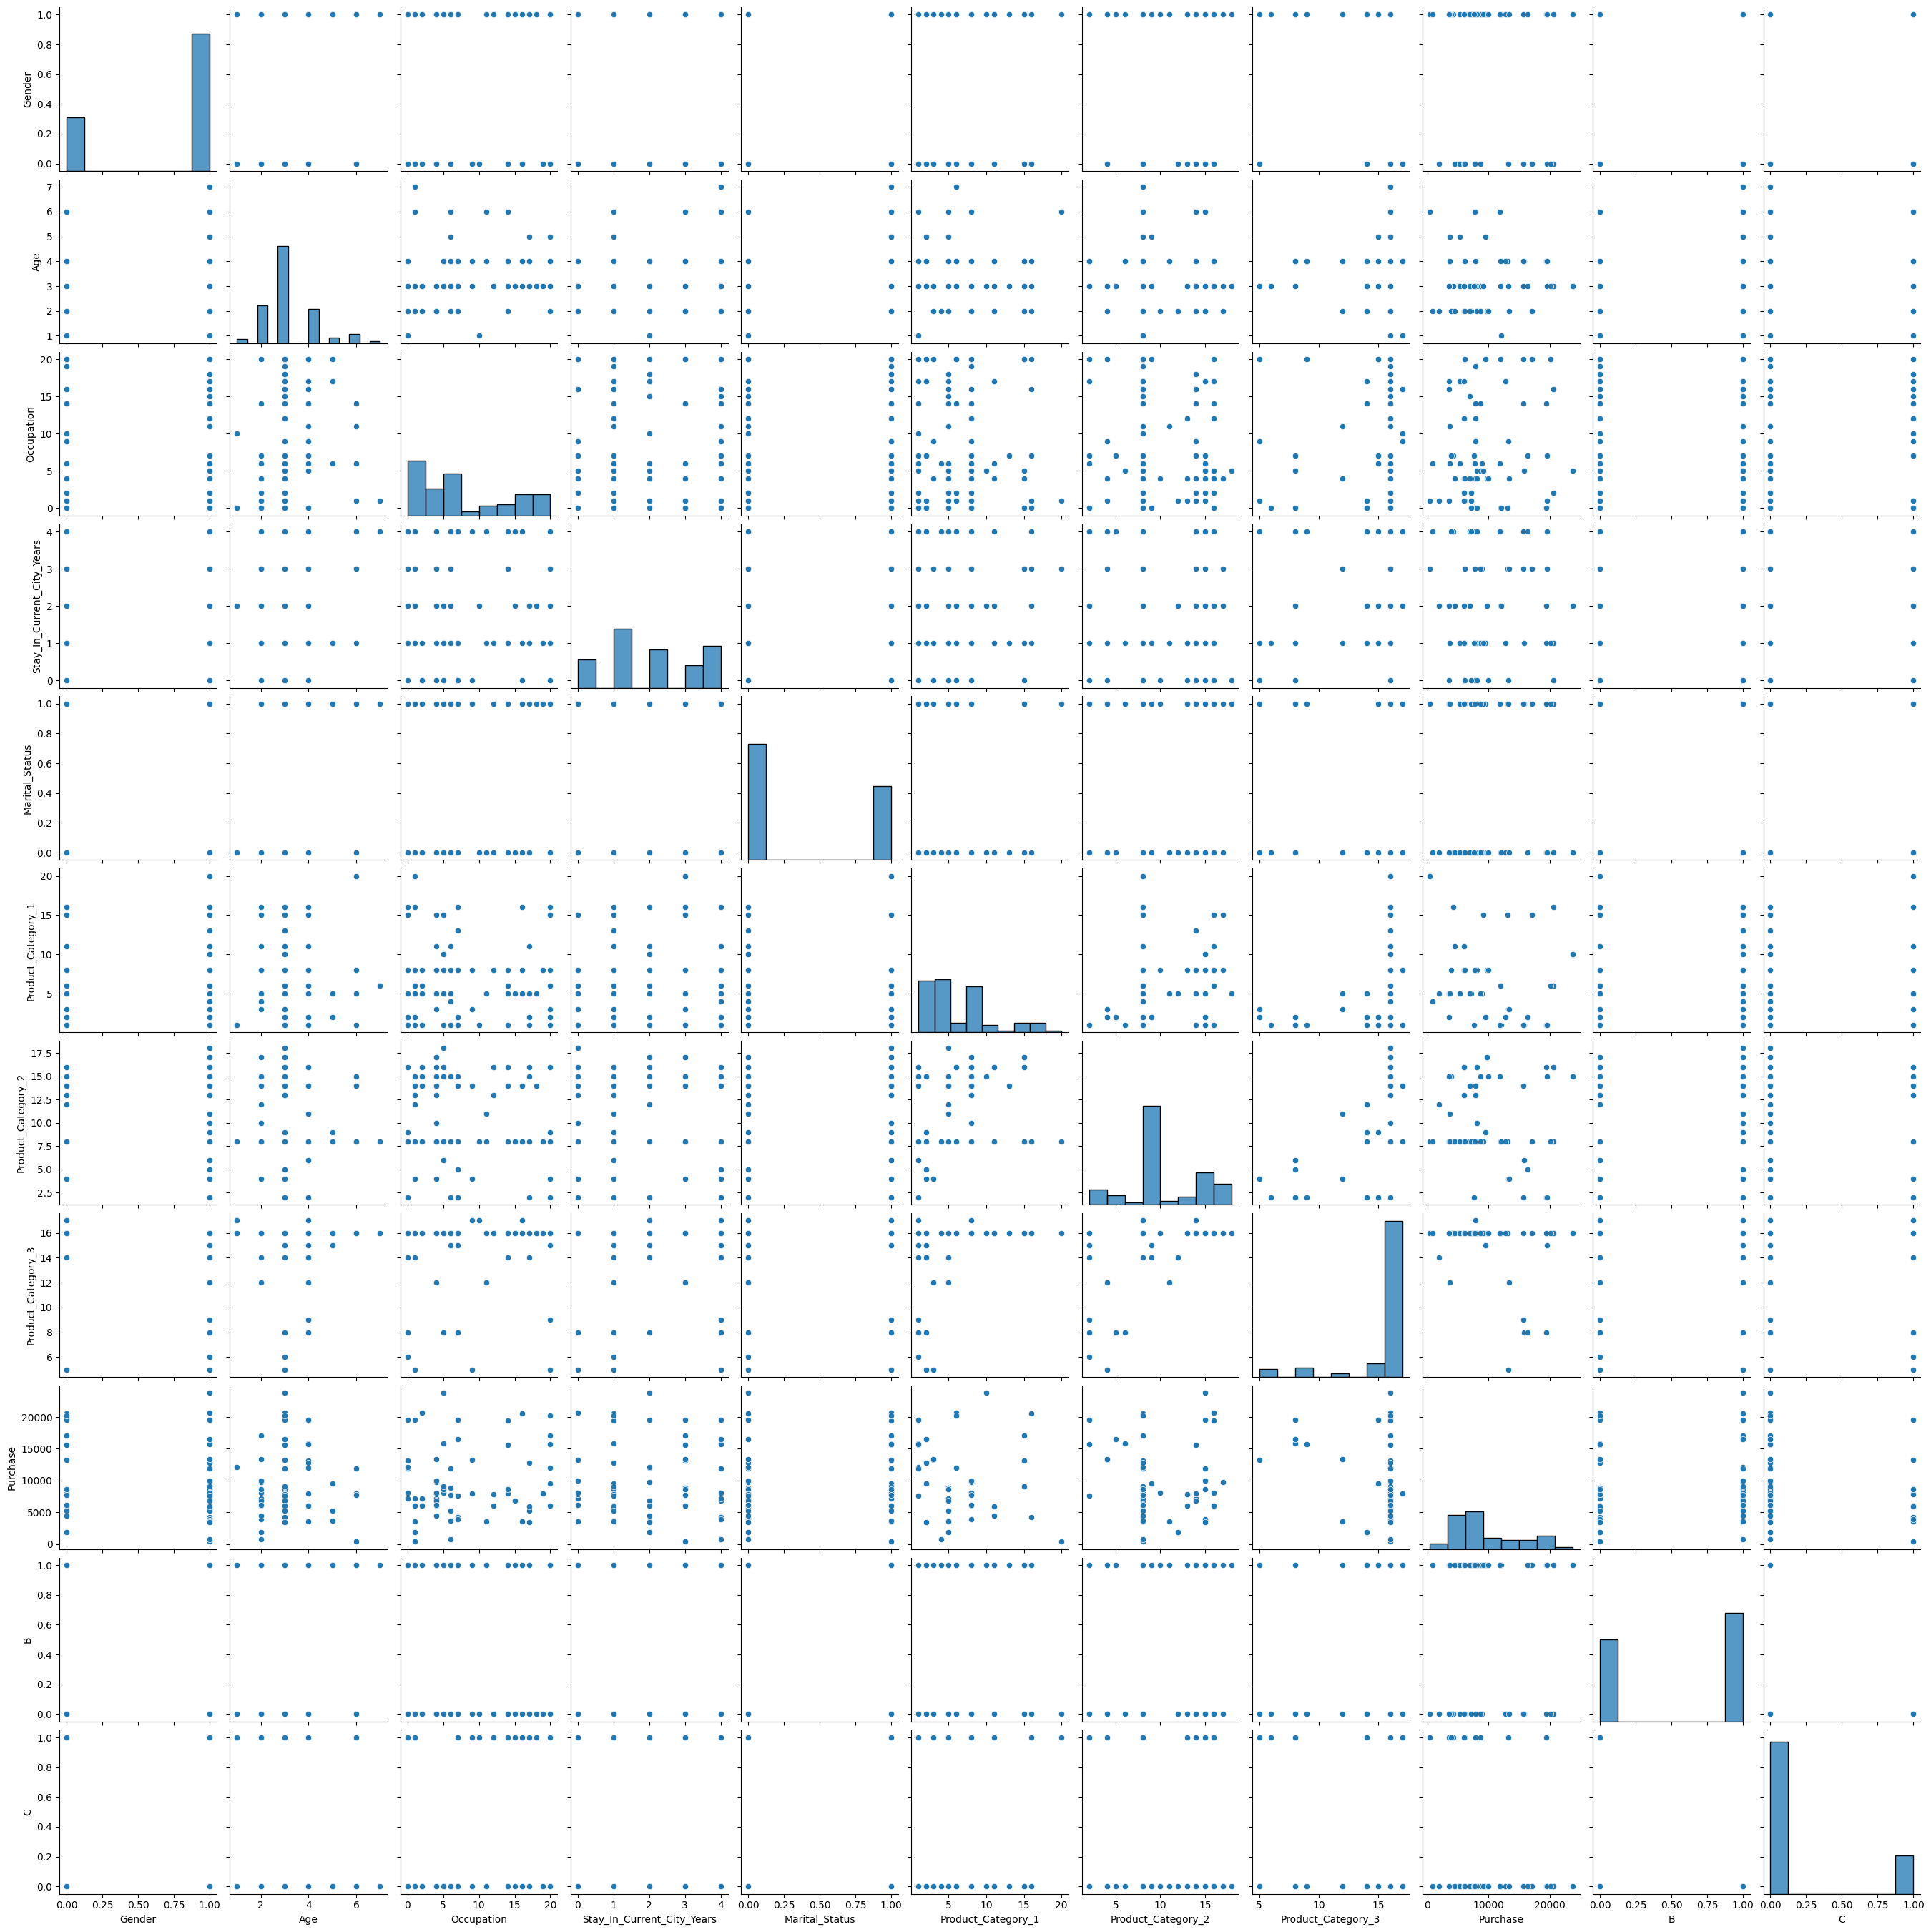

In [97]:
sns.pairplot(data.sample(100))

<Axes: xlabel='Age', ylabel='Purchase'>

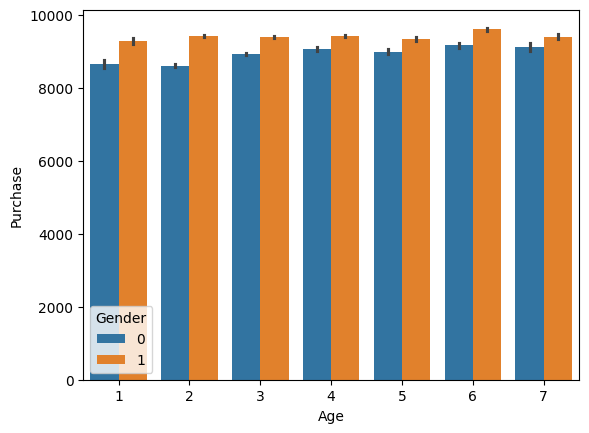

In [98]:
# hue is like separating or grouping based on a variable
sns.barplot(x='Age',y='Purchase',hue='Gender',data=data)

purchase of men over women is high

<Axes: xlabel='Occupation', ylabel='Purchase'>

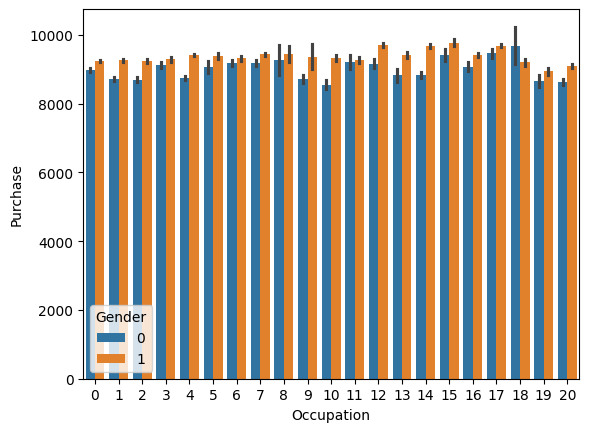

In [99]:
# Visulation of Purchase with Occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=data)

Almost Uniform Distribution

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

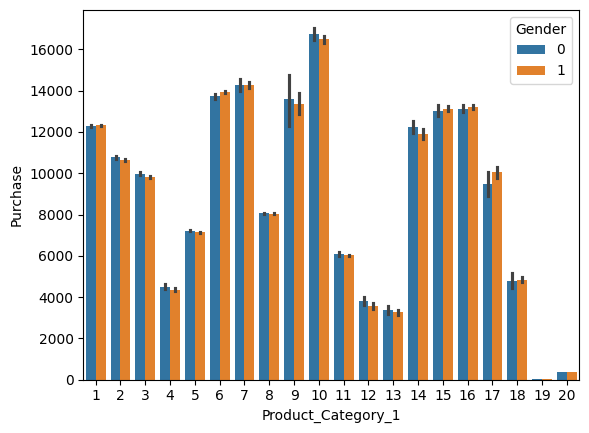

In [100]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=data)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

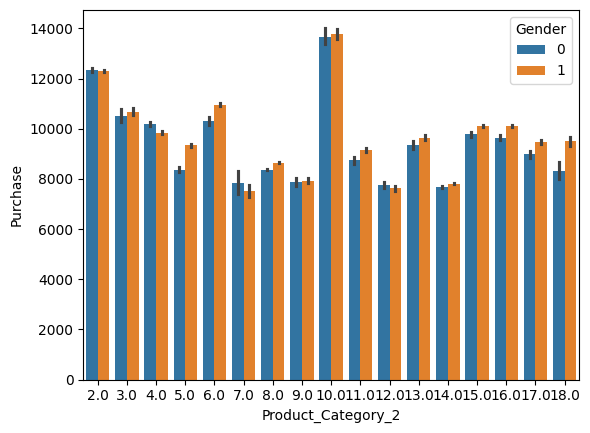

In [101]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=data)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

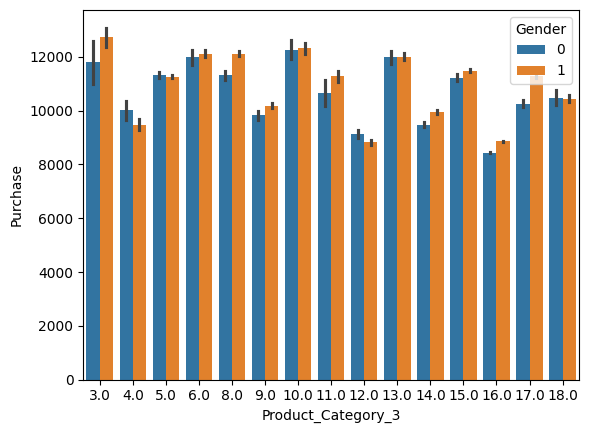

In [102]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=data)

## Feature Scaling

basically rows with purchase value as null beong to test data
so simply separate them
as these have obtained after all preprocessing

In [103]:
df_test=data[data['Purchase'].isnull()]
df_train=data[~data['Purchase'].isnull()]

In [104]:
X=df_train[:-1]         # x is set of independent features
y=df_train['Purchase']  # y is dependant feature

In [105]:
# Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size=0.33, random_state=42)

X_train.drop('Product_ID',axis=1,inplace=True)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

ModuleNotFoundError: No module named 'sklearn'

# NOW JUST TRAIN THE MODEL

# BELOW THING ALL DONE BY ME

### From here we can see that majority of Product_Category2 and 3 are null values

Distribution of Ages

Gender
F    135809
M    414259
dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24124\4065595414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=df_train,palette=['pink','green'])


<Axes: xlabel='Gender', ylabel='count'>

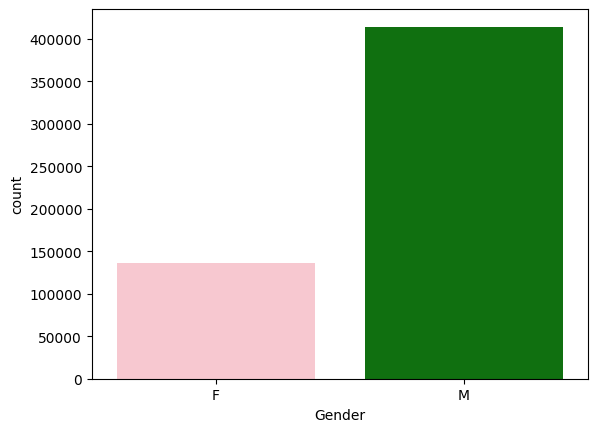

In [ ]:
print(df_train.groupby('Gender').size())

sns.countplot(x='Gender',data=df_train,palette=['pink','green'])

<Axes: xlabel='Age', ylabel='Count'>

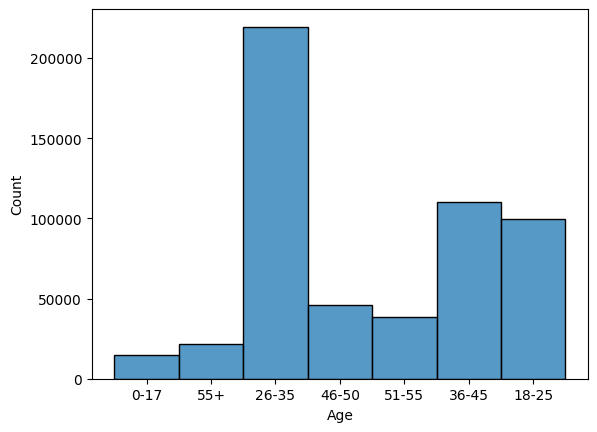

In [ ]:
sns.histplot(x='Age',data=df_train)

<Axes: xlabel='Age', ylabel='Purchase'>

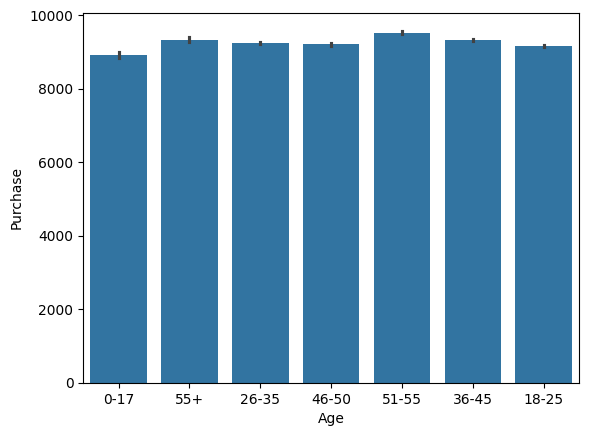

In [ ]:
sns.barplot(x='Age',y='Purchase',data=df_train)